# **2. Data**

## **a. Data Selecting**

In [ ]:
#https://drive.google.com/file/d/1OQZCfrQPizai6Js5rwFDRq9X3kIQqrpP/view?usp=sharing        #97.mat
#https://drive.google.com/file/d/1hTxR2UiHY_EcSvs5v8KvS2uAY8QzXb5g/view?usp=sharing        #105.mat

In [1]:
!pip install --upgrade --no-cache-dir gdown      # Downloading the dataset file from google colab
!gdown 1OQZCfrQPizai6Js5rwFDRq9X3kIQqrpP


  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From (original): https://drive.google.com/uc?id=1OQZCfrQPizai6Js5rwFDRq9X3kIQqrpP
From (redirected): https://drive.google.com/uc?id=1OQZCfrQPizai6Js5rwFDRq9X3kIQqrpP&confirm=t&uuid=aced8804-af78-4aea-94ae-4e5fd3ba5db2
To: /content/97.mat
100% 3.90M/3.90M [00:00<00:00, 161MB/s]


In [2]:
!gdown 1hTxR2UiHY_EcSvs5v8KvS2uAY8QzXb5g

Downloading...
From (original): https://drive.google.com/uc?id=1hTxR2UiHY_EcSvs5v8KvS2uAY8QzXb5g
From (redirected): https://drive.google.com/uc?id=1hTxR2UiHY_EcSvs5v8KvS2uAY8QzXb5g&confirm=t&uuid=27a5e06e-23b6-4a8c-bd6a-c4c1c26d9661
To: /content/105.mat
100% 2.91M/2.91M [00:00<00:00, 192MB/s]


In [3]:
import scipy.io as scio
import numpy as np
import pandas as pd

# Load the .mat files:

mat_105 = scio.loadmat('/content/105.mat')
variables=scio.whosmat('/content/105.mat')
print(variables)

mat_105_DE=mat_105['X105_DE_time']
mat_105_FE=mat_105['X105_FE_time']

mat_97 = scio.loadmat('/content/97.mat')
variables=scio.whosmat('/content/97.mat')
print(variables)

mat_97_DE=mat_97['X097_DE_time']
mat_97_FE=mat_97['X097_FE_time']

[('X105_DE_time', (121265, 1), 'double'), ('X105_FE_time', (121265, 1), 'double'), ('X105_BA_time', (121265, 1), 'double'), ('X105RPM', (1, 1), 'double')]
[('X097_DE_time', (243938, 1), 'double'), ('X097_FE_time', (243938, 1), 'double'), ('X097RPM', (1, 1), 'double')]


### **M & N window for 105.mat**

In [10]:
import pandas as pd
import numpy as np

#convert data to dataframe:
df_105_DE=pd.DataFrame(mat_105_DE)
df_105_FE=pd.DataFrame(mat_105_FE)

fault_105=[]

for i in range(500):
   new=np.concatenate([df_105_DE.values[i*200:200+i*200], df_105_FE.values[i*200:200+i*200]])
   new=np.reshape(new,(200,2))
   fault_105.append(new)

fault_105 = np.squeeze(fault_105)
print(fault_105.shape)

(500, 200, 2)


### **M & N window for 97.mat**

In [12]:
import pandas as pd
import numpy as np

#convert data to dataframe:
df_97_DE=pd.DataFrame(mat_97_DE)
df_97_FE=pd.DataFrame(mat_97_FE)

normal_97=[]

for i in range(700):
   new=np.concatenate([df_97_DE.values[i*200:200+i*200], df_97_FE.values[200*i:200+200*i]])
   new=np.reshape(new,(200,2))
   normal_97.append(new)

normal_97 = np.squeeze(normal_97)
print(normal_97.shape)

(700, 200, 2)


### **Total Data**

In [61]:
#-----*****Total Data***** ------ :
X = np.concatenate((normal_97, fault_105))
print(X.shape)
Y = np.concatenate((np.zeros(len(normal_97)), np.ones(len(fault_105))))
print(Y.shape)

(1200, 200, 2)
(1200,)


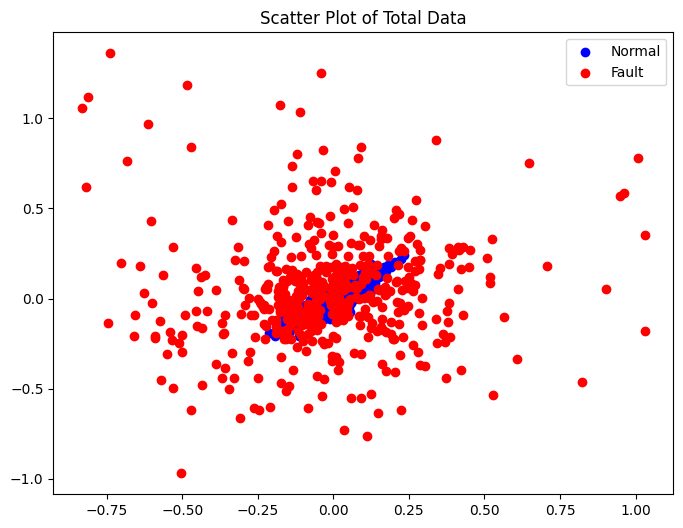

In [81]:
import matplotlib.pyplot as plt
X_reshaped = X.reshape((1200, -1))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

# Plotting normal data (class 0) in blue color
ax.scatter(X_reshaped[Y == 0, 0], X_reshaped[Y == 0, 1], c='blue', label='Normal')

# Plotting fault data (class 1) in red color
ax.scatter(X_reshaped[Y == 1, 0], X_reshaped[Y == 1, 1], c='red', label='Fault')

# Adding title
ax.set_title('Scatter Plot of Total Data')

# Adding legend
ax.legend()
plt.show()

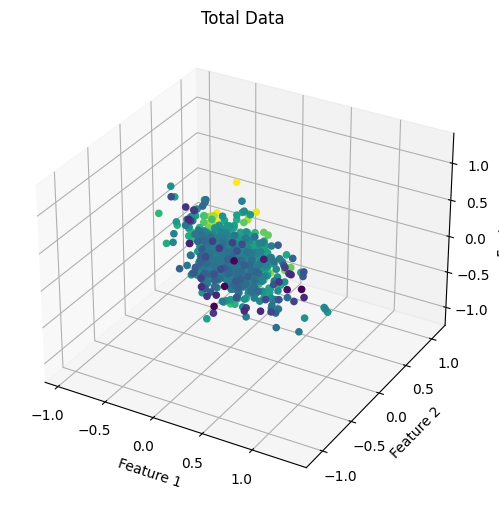

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data with a different colormap
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

# Plot the data with a different colormap
#'viridis', 'jet', 'rainbow', and 'cividis'
ax.scatter(x, y, z, c=y, cmap='viridis', alpha=1)

# Set the labels for the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Total Data')
# Show the plot
plt.show()

## **b. Feature Selection & Data Generation**

In [25]:
import numpy as np
from scipy.stats import skew , kurtosis

# Peak
peak_X = X.max(axis=1)

#Peak to Peak
pp_X = np.ptp(X , axis=1)

#Crest factor
Crest_factor_X = np.max(X , axis=1) / np.sqrt(np.mean(X**2 , axis=1))

# Standard deviation
std_X = X.std(axis=1)

# Mean
mean_X = np.mean(X , axis=1)

# Root mean square
RMS_X = np.sqrt(np.mean(X**2 , axis=1))

# Kurtosis
Kurtosis_X =kurtosis(X , axis=1)

# Skewness
skew_X = skew(X , axis=1)

# Absolute mean
abs_mean_X = np.mean(np.abs(X), axis=1)

In [65]:
# Create new dataset
X_new = np.concatenate([abs_mean_X , skew_X , Kurtosis_X , RMS_X , mean_X , std_X , Crest_factor_X , pp_X ,  peak_X] , axis=1)
print("New dataset shape :", X_new.shape)

New dataset shape : (1200, 18)


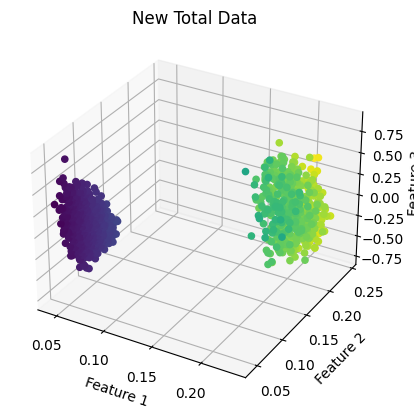

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data with a different colormap
x = X_new[:, 0]
y = X_new[:, 1]
z = X_new[:, 2]

ax.scatter(x, y, z,c=y, cmap='viridis', alpha=1)

# Set the labels for the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('New Total Data')
# Show the plot
plt.show()

## **c. Data Shuffling**

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_new)

In [68]:
data= pd.DataFrame(X_normalized,columns=['std_1','std_2','peak_1','peak_2', 'skew_1', 'skew_2',
                                  'kurtosis_1', 'kurtosis_2', 'crest_factor_1', 'crest_factor_2','ptp_1', 'ptp_2',
                                  'mean_1', 'mean_2', 'RMS_1', 'RMS_2', 'abs_mean_1', 'abs_mean_2'])

In [69]:
data.head()

,std_1,std_2,peak_1,peak_2,skew_1,skew_2,kurtosis_1,kurtosis_2,crest_factor_1,crest_factor_2,ptp_1,ptp_2,mean_1,mean_2,RMS_1,RMS_2,abs_mean_1,abs_mean_2
0,0.180650,0.170435,0.401732,0.476393,0.090861,0.098024,0.153866,0.146974,0.493036,0.478192,0.147598,0.141721,0.205745,0.267895,0.084019,0.088506,0.072364,0.090429
1,0.087553,0.085541,0.605059,0.658357,0.051628,0.064077,0.073250,0.073464,0.533692,0.515968,0.062241,0.064023,0.192195,0.163109,0.033135,0.034911,0.035152,0.033254
2,0.130858,0.135850,0.492481,0.543424,0.027339,0.033083,0.109856,0.110176,0.355219,0.352781,0.106645,0.107659,0.084513,0.098841,0.046930,0.051714,0.028971,0.035619
3,0.032935,0.032309,0.604937,0.644457,0.123916,0.114183,0.027396,0.029026,0.352330,0.354287,0.021723,0.023940,0.344315,0.281651,0.039768,0.031188,0.038757,0.032596
4,0.095227,0.098253,0.426178,0.474546,0.093398,0.097014,0.084096,0.087094,0.392406,0.384715,0.079033,0.083030,0.130648,0.182249,0.052959,0.062532,0.028316,0.043012


In [70]:
from sklearn.model_selection import train_test_split

# Shuffle the data
#shuffled_data = data.sample(frac=1, random_state=14)

# Split the shuffled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=14)


# **3. Coding**

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# The average logistic loss
def compute_loss(Y, Y_hat):
    Y = np.array(Y)
    Y_hat = np.array(Y_hat)
    epsilon = 1e-15
    # Clip probabilities to ensure they are in (0, 1) range
    Y_hat = np.clip(Y_hat, epsilon, 1 - epsilon)

    return -np.mean(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))

def gradient_descent(X, Y, Y_hat, w, b, learning_rate):
    m = X.shape[0]
    dw = (1/m) * np.dot(X.T, (Y_hat - Y))
    db = (1/m) * np.sum(Y_hat - Y)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

def evaluate_model(Y, Y_hat):
    Y_pred = Y_hat > 0.5
    accuracy = np.mean(Y_pred == Y)
    precision = np.sum((Y_pred == 1) & (Y == 1)) / np.sum(Y_pred == 1)
    return accuracy, precision

In [47]:
# Model initialization
w = np.zeros((X_train.shape[1], 1))
b = 0
y_train = y_train.reshape(-1, 1)
learning_rate = 0.05
iterations = 100
losses = []


for i in range(iterations):
    Z = np.dot(X_train, w) + b
    Y_hat = sigmoid(Z)
    loss = compute_loss(y_train, Y_hat)
    w, b = gradient_descent(X_train, y_train, Y_hat, w, b, learning_rate)
    losses.append(loss)
    print(f"Iteration {i+1}: Loss {loss}")

y_test = y_test.reshape(-1, 1)
Z_test = np.dot(X_train, w) + b
Y_hat_test = sigmoid(Z_test)
accuracy, precision = evaluate_model(y_test, Y_hat_test)
print(f"\nTest Accuracy: {accuracy}, Test Precision: {precision}")

plt.plot(losses)
plt.title("Loss Function")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

Iteration 1: Loss 0.6931471805599453
Iteration 2: Loss 0.6684000473207019
Iteration 3: Loss 0.6460642605165335
Iteration 4: Loss 0.6258912728524518
Iteration 5: Loss 0.6076536411861021
Iteration 6: Loss 0.5911452381915664
Iteration 7: Loss 0.5761806516721883
Iteration 8: Loss 0.5625940528656128
Iteration 9: Loss 0.5502377544223058
Iteration 10: Loss 0.5389806215847643
Iteration 11: Loss 0.5287064513761778
Iteration 12: Loss 0.5193123958324551
Iteration 13: Loss 0.5107074760364887
Iteration 14: Loss 0.502811212579813
Iteration 15: Loss 0.4955523834524546
Iteration 16: Loss 0.48886791068743946
Iteration 17: Loss 0.4827018710293798
Iteration 18: Loss 0.4770046223928849
Iteration 19: Loss 0.47173203611627545
Iteration 20: Loss 0.4668448244044964
Iteration 21: Loss 0.4623079524683598
Iteration 22: Loss 0.45809012541122596
Iteration 23: Loss 0.4541633406902241
Iteration 24: Loss 0.4505024978566868
Iteration 25: Loss 0.44708505817692473
Iteration 26: Loss 0.4438907475998849
Iteration 27: Loss

ValueError: operands could not be broadcast together with shapes (960,1) (240,1) 

# **4. sklearn.linear_model**

Classification Report (SGDClassifier):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       136
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Train Accuracy: 1.0, Test Accuracy: 1.0
Train Precision: 1.0, Test Precision: 1.0


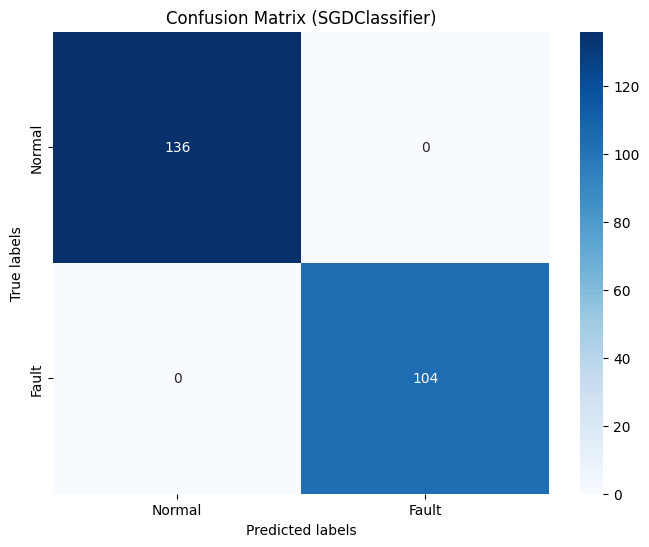

In [73]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, precision_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape to be 1-dimensional
y_train_ravel = y_train.ravel()
y_test_ravel = y_test.ravel()

# Create and train the SGDClassifier model
sgd_classifier = SGDClassifier(loss='log_loss', max_iter=100 , learning_rate='constant', eta0=0.05)
sgd_classifier.fit(X_train, y_train_ravel)

# Predictions using SGDClassifier model
y_pred_train = sgd_classifier.predict(X_train)
y_pred_test = sgd_classifier.predict(X_test)


# Classification report and confusion matrix for SGDClassifier model
print("Classification Report (SGDClassifier):\n", classification_report(y_test, y_pred_test))
cm_sgd = confusion_matrix(y_test, y_pred_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
print(f"Train Precision: {train_precision}, Test Precision: {test_precision}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (SGDClassifier)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['Normal', 'Fault'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['Normal', 'Fault'])
plt.show()


Train Accuracy: 1.0, Test Accuracy: 1.0
Train Precision: 1.0, Test Precision: 1.0


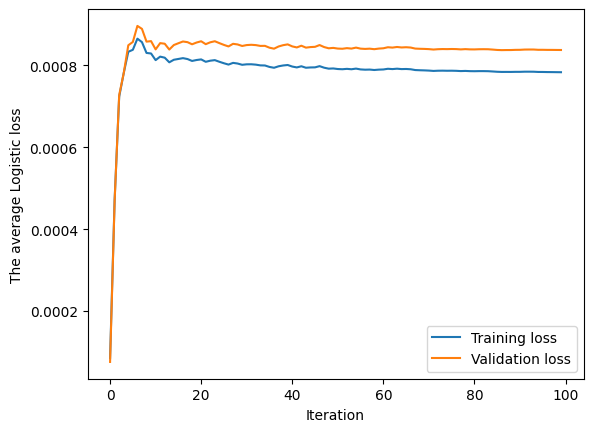

In [80]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score

model = SGDClassifier(loss='log_loss', max_iter=10 , learning_rate='optimal', eta0=0.01)

# Reshape to be 1-dimensional
y_train_ravel = y_train.ravel()
y_test_ravel = y_test.ravel()

train_losses = []
val_losses = []

# Manual training loop
for _ in range(100):
    model.partial_fit(X_train, y_train_ravel, classes=np.unique(Y))  # Partially fit the model

    # Calculate probabilities
    train_probs = model.predict_proba(X_train)[:, 1]
    val_probs = model.predict_proba(X_test)[:, 1]

    # Calculate and record the custom loss
    train_loss = compute_loss(y_train, train_probs)
    val_loss = compute_loss(y_test, val_probs)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
print(f"Train Precision: {train_precision}, Test Precision: {test_precision}")

# Plotting the loss curve
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Iteration')
plt.ylabel('The average Logistic loss')
plt.legend()
plt.show()